# 数字图像处理实验四

## 任务1

- 自己实现一个Gamma变换（考虑是否使用查找表）

- 和程序库自带的版本（Matlab、Pillow、OpenCV或者其他图像库）进行变换结果和计算效率的比较

- 至少在“light.tif”“ dark.png”上进行测试


In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

In [27]:
light = cv2.imread('light.tif')
dark = cv2.imread('dark.png')

In [28]:
light.shape

(769, 765, 3)

In [29]:
def gamma_correction(img,gamma):
    '''
    使用查表进行的伽马变换
    img:图像
    gamma:伽马值
    '''
    gamma_table = [np.power(x/255.0,gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    return cv2.LUT(img,gamma_table)

In [30]:
def gamma(img,g):
    '''
    没有使用查表进行的伽马变换
    img:图像
    g:伽马值
    '''
    img = img.astype(np.float32) / 255 # 灰度归一至[0,1]
    img = np.power(img, g) # 乘方
    return img

In [31]:
%%time
light_g1 = gamma_correction(light,2.5)

Wall time: 2 ms


In [32]:
%%time
light_g2 = gamma(light,2.5)

Wall time: 26 ms


In [33]:
%%time
light_g3 = exposure.adjust_gamma(light, 2.5)

Wall time: 6 ms


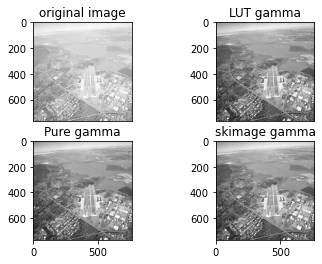

In [34]:
plt.subplot(2,2,1)
plt.imshow(light[:,:,::-1])
plt.title('original image')
plt.xticks([])
plt.subplot(2,2,2)
plt.imshow(light_g1[:,:,::-1])
plt.title('LUT gamma')
plt.xticks([])
plt.subplot(2,2,3)
plt.imshow(light_g2[:,:,::-1])
plt.title('Pure gamma')
plt.subplot(2,2,4)
plt.imshow(light_g3[:,:,::-1])
plt.title('skimage gamma')
plt.show()

In [35]:
%%time
dark_g1 = gamma_correction(dark,0.5)

Wall time: 999 µs


In [36]:
%%time
dark_g2 = gamma(dark,0.5)

Wall time: 12 ms


In [37]:
%%time
dark_g3 = exposure.adjust_gamma(dark,0.5)

Wall time: 3 ms


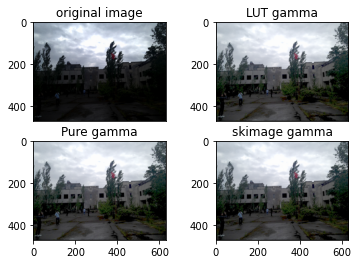

In [38]:
plt.subplot(2,2,1)
plt.imshow(dark[:,:,::-1])
plt.title('original image')
plt.xticks([])
plt.subplot(2,2,2)
plt.imshow(dark_g1[:,:,::-1])
plt.title('LUT gamma')
plt.xticks([])
plt.subplot(2,2,3)
plt.imshow(dark_g2[:,:,::-1])
plt.title('Pure gamma')
plt.subplot(2,2,4)
plt.imshow(dark_g3[:,:,::-1])
plt.title('skimage gamma')
plt.show()

## 任务2

- 自己实现直方图均衡化，并和所选图像库中函数进行结果对比，并绘出变换前后的直方图。

- 至少在如下图像上测试：school.png, baby.png, hill.jpg

In [39]:
school = cv2.imread('school.png',0)
baby = cv2.imread('baby.png',0)
hill = cv2.imread('hill.jpg',0)

In [40]:
school.shape

(471, 630)

In [41]:
def equalizehist(img,L=256):
    '''
    img:图像
    L:灰度级，默认256
    '''
    h,w = img.shape
    hist = cv2.calcHist([img],[0],None,[256],[0,255]) # 统计各个灰度级的像素个数
    hists_cumsum = np.cumsum(hist)/ (h * w) # 归一化
    hists_cdf = ((L-1) * hists_cumsum).astype("uint8") # 计算灰度级变换的值，并取整
    equal_img = hists_cdf[img] # 对原图像进行变换
    return equal_img

In [42]:
%%time
school_e1=cv2.equalizeHist(school)

Wall time: 0 ns


In [43]:
%%time
school_e2=equalizehist(school)

Wall time: 995 µs


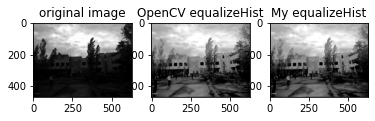

In [44]:
plt.subplot(1,3,1)
plt.imshow(school)
plt.set_cmap('gray')
plt.title('original image')
plt.subplot(1,3,2)
plt.imshow(school_e1)
plt.set_cmap('gray')
plt.title('OpenCV equalizeHist')
plt.subplot(1,3,3)
plt.imshow(school_e2)
plt.set_cmap('gray')
plt.title('My equalizeHist')
plt.show()

In [45]:
%%time
baby_e1=cv2.equalizeHist(baby)

Wall time: 0 ns


In [46]:
%%time
baby_e2=equalizehist(baby)

Wall time: 3.01 ms


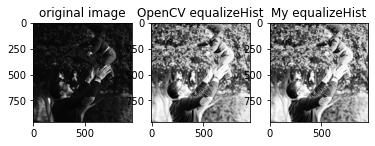

In [47]:
plt.subplot(1,3,1)
plt.imshow(baby)
plt.set_cmap('gray')
plt.title('original image')
plt.subplot(1,3,2)
plt.imshow(baby_e1)
plt.set_cmap('gray')
plt.title('OpenCV equalizeHist')
plt.subplot(1,3,3)
plt.imshow(baby_e2)
plt.set_cmap('gray')
plt.title('My equalizeHist')
plt.show()

In [48]:
%%time
hill_e1=cv2.equalizeHist(hill)

Wall time: 1.01 ms


In [49]:
%%time
hill_e2=equalizehist(hill)

Wall time: 998 µs


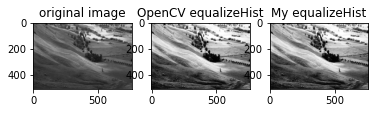

In [50]:
plt.subplot(1,3,1)
plt.imshow(hill)
plt.set_cmap('gray')
plt.title('original image')
plt.subplot(1,3,2)
plt.imshow(hill_e1)
plt.set_cmap('gray')
plt.title('OpenCV equalizeHist')
plt.subplot(1,3,3)
plt.imshow(hill_e2)
plt.set_cmap('gray')
plt.title('My equalizeHist')
plt.show()